#### Import numpy, matplotlib.pyplot and make it inline

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

To have a dataset or set of data points,generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that:
<b>yi = a*xi + b (and a = -1, b = 2)</b>


In [ ]:
X = np.linspace(0,20)
X

array([ 0.        ,  0.40816327,  0.81632653,  1.2244898 ,  1.63265306,
        2.04081633,  2.44897959,  2.85714286,  3.26530612,  3.67346939,
        4.08163265,  4.48979592,  4.89795918,  5.30612245,  5.71428571,
        6.12244898,  6.53061224,  6.93877551,  7.34693878,  7.75510204,
        8.16326531,  8.57142857,  8.97959184,  9.3877551 ,  9.79591837,
       10.20408163, 10.6122449 , 11.02040816, 11.42857143, 11.83673469,
       12.24489796, 12.65306122, 13.06122449, 13.46938776, 13.87755102,
       14.28571429, 14.69387755, 15.10204082, 15.51020408, 15.91836735,
       16.32653061, 16.73469388, 17.14285714, 17.55102041, 17.95918367,
       18.36734694, 18.7755102 , 19.18367347, 19.59183673, 20.        ])

In [ ]:
a=-1
b=2
y=a*X+b
y

array([  2.        ,   1.59183673,   1.18367347,   0.7755102 ,
         0.36734694,  -0.04081633,  -0.44897959,  -0.85714286,
        -1.26530612,  -1.67346939,  -2.08163265,  -2.48979592,
        -2.89795918,  -3.30612245,  -3.71428571,  -4.12244898,
        -4.53061224,  -4.93877551,  -5.34693878,  -5.75510204,
        -6.16326531,  -6.57142857,  -6.97959184,  -7.3877551 ,
        -7.79591837,  -8.20408163,  -8.6122449 ,  -9.02040816,
        -9.42857143,  -9.83673469, -10.24489796, -10.65306122,
       -11.06122449, -11.46938776, -11.87755102, -12.28571429,
       -12.69387755, -13.10204082, -13.51020408, -13.91836735,
       -14.32653061, -14.73469388, -15.14285714, -15.55102041,
       -15.95918367, -16.36734694, -16.7755102 , -17.18367347,
       -17.59183673, -18.        ])

### Plot X vs. y

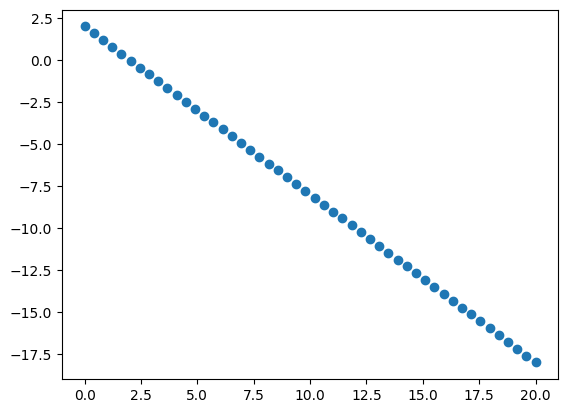

In [ ]:
plt.scatter(X,y)

#### Use your final version of the implemented Batch GD algorithm for single variable to find the best line filt of the given data.
#### Choose the suitable number of iterations, learning rate, and stop criteria.
#### Calculate r2 score. Shouldn't below 0.9
#### Plot the required curves (loss-epochs, loss-theta0, loss-theta1, all fitted lines per epoch (single graph), best fit line)

In [ ]:
def batchgrad(x , y , LR , iters):
  loss = []
  theta0s = []
  theta1s = []
  theta0 = 0
  theta1 = 0
  hypos = []
  prev_cost = float('inf')
  m = len(X)

  for i in range(iters):
    print("**********iteration",i,"**********\n")
    theta0s.append(theta0)
    theta1s.append(theta1)  #same size this way
    print("theta 0 ", theta0,"\n")
    print("theta 1 ", theta1,"\n")

    h = theta0 + theta1*x
    hypos.append(h)
    print("h ", h,"\n")
    error_vec = h-y
    print("errorvec " ,error_vec,"\n")
    j = np.mean(error_vec**2) / 2
    loss.append(j)
    print("j ",j,"\n")
    d_theta0 = np.sum(error_vec) / m
    d_theta1 = np.sum(error_vec*x)  / m
    gradvec = np.array([d_theta0,d_theta1])
    print("grad vector ", gradvec,"\n")
    gradvecNorm = np.linalg.norm(gradvec)

    print("grad vector norm ", gradvecNorm,"\n")

    if gradvecNorm < 0.001 or abs(prev_cost - j) < 0.001:
      break
    else:
      prev_cost = j
      theta0 = theta0 - LR * d_theta0
      theta1 = theta1 - LR * d_theta1

  return theta0s, theta1s, loss, theta0, theta1 , h , hypos

In [ ]:
theta0s , theta1s , loss , theta0, theta1 , h ,hs= batchgrad(X, y, 0.0005, 300)

**********iteration 0 **********

theta 0  0 

theta 1  0 

h  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.] 

errorvec  [-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ] 

j  49.34693877551021 

grad vector  [  8.         114.69387755] 

grad vector norm  114.97254258164628 

**********iteration 1 **********

theta 0  -0.004 

the

In [ ]:
from sklearn.metrics import r2_score
r2_score(y,h)

0.9686158031920962

#### Try your function with any input parameterss of your choice.
##### The following results uses alpha = 0.0005 and max. iterations = 300.

****************** Iteration 0 ********************

h(x):
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector:
[-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]

j = 49.34693877551021

Gradient Vector:
[[  8.        ]
 [114.69387755]]

Gradient Vector Norm:
114.97254258164628

theta_0_new : -0.004
theta_1_new : -0.05734693

r2_score: 0.9686158031920962


##### It is recommended to define a function for each plot. This will help you to easly plot the learning curves when you use different values of hyperparameters.

In [ ]:
#Plot the required curves (loss-epochs, loss-theta0, loss-theta1, all fitted lines per epoch (single graph), best fit line)

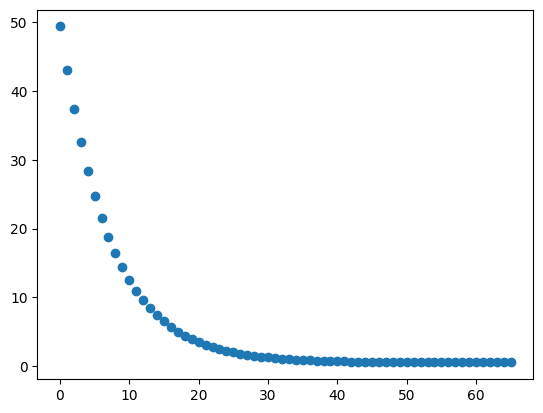

In [ ]:
epochs = list(range(len(loss)))
plt.scatter(epochs, loss)

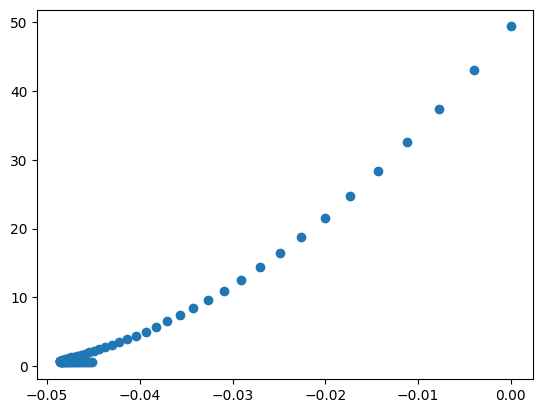

In [ ]:
plt.scatter(theta0s,loss)

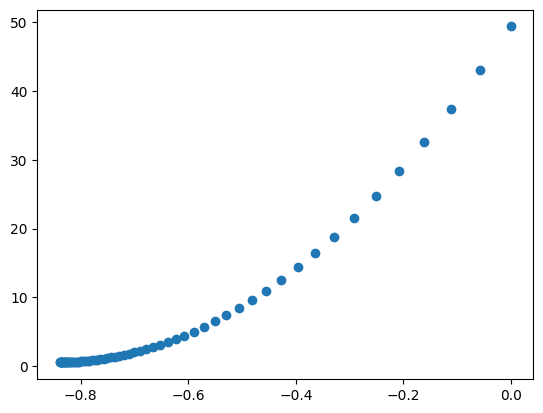

In [ ]:
plt.scatter(theta1s,loss)

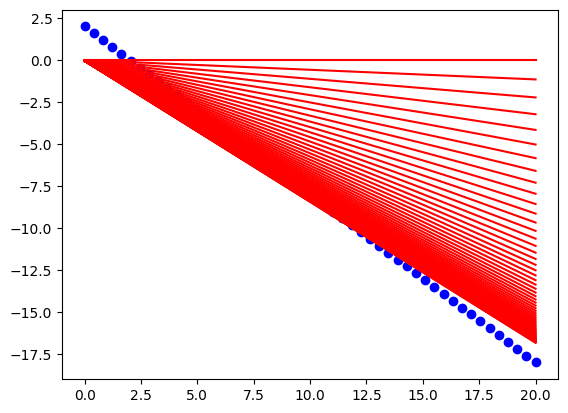

In [ ]:
plt.scatter(X,y,color='blue')
for i in range(len(hs)):
  plt.plot(X,hs[i],color='red')
  plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

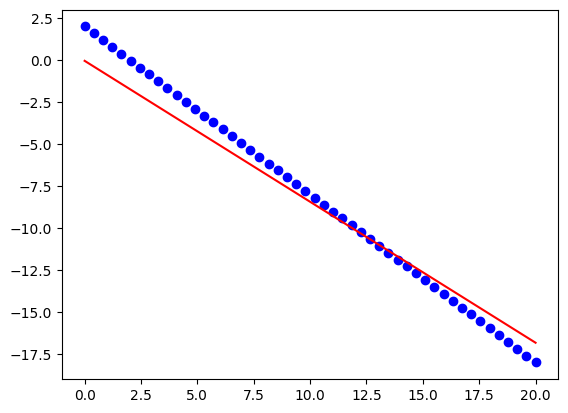

In [ ]:
plt.scatter(X,y,color='blue')
plt.plot(X,h,color='red')
plt.show

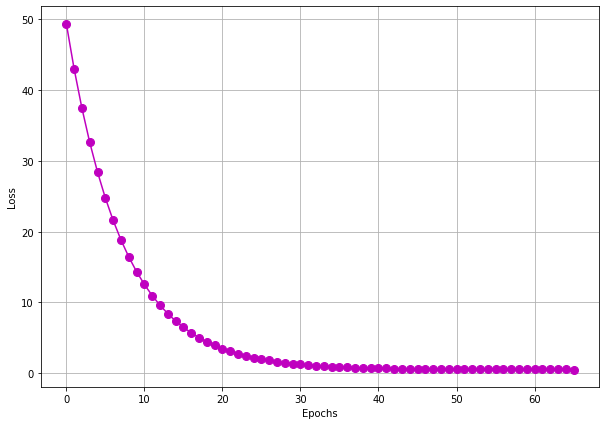

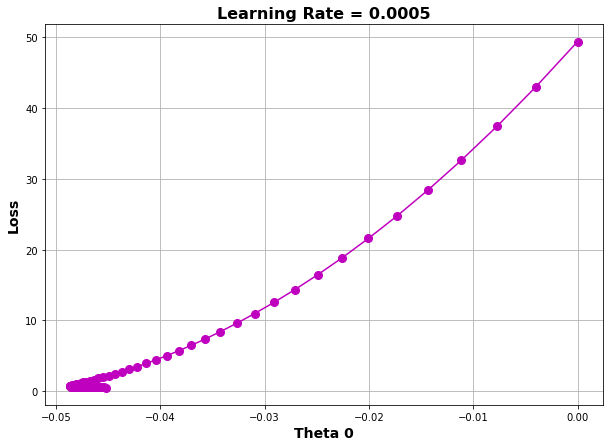

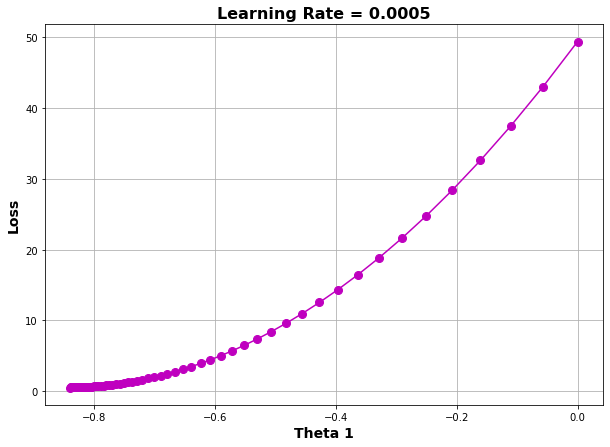

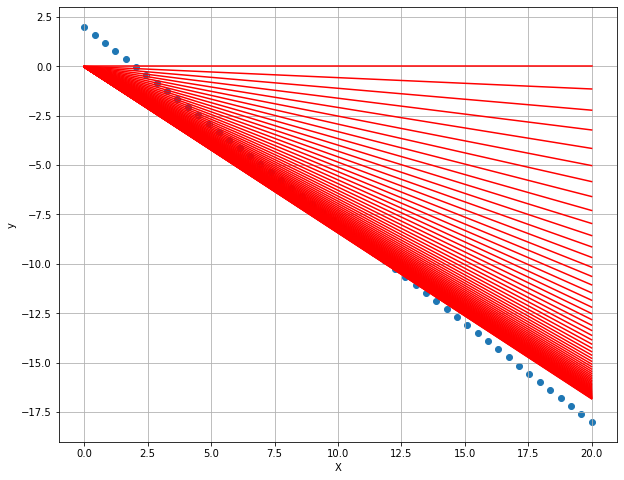

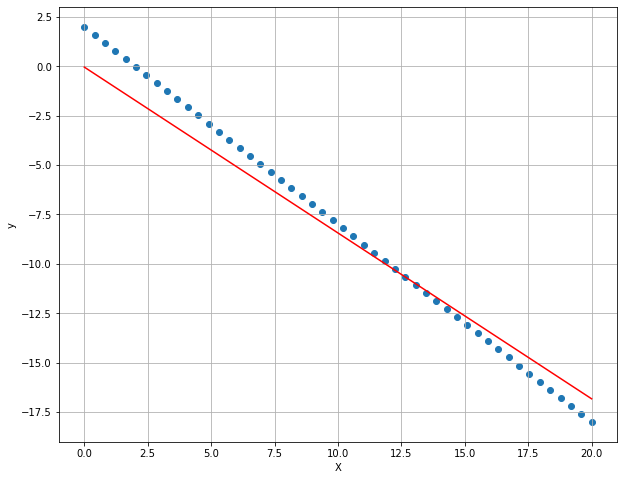

### Update your Batch GD for single variable  implementation (Batch variant) to be Momentum-Based GD and check your results

In [ ]:
def mom(x , y , LR , gamma , iters):
  loss = []
  theta0s = []
  theta1s = []
  theta0 = 0
  theta1 = 0
  hypos = []
  prev_cost = float('inf')
  m = len(X)
  v_theta0 = 0
  v_theta1 = 0
  for i in range(iters):
    print("**********iteration",i,"**********\n")
    theta0s.append(theta0)
    theta1s.append(theta1)  #same size this way
    print("theta 0 ", theta0,"\n")
    print("theta 1 ", theta1,"\n")
    h = theta0 + theta1*x
    hypos.append(h)
    print("h ", h,"\n")
    error_vec = h-y
    print("errorvec " ,error_vec,"\n")
    j = np.mean(error_vec**2) / 2
    loss.append(j)
    print("j ",j,"\n")
    d_theta0 = np.sum(error_vec) / m
    d_theta1 = np.sum(error_vec*x)  / m
    gradvec = np.array([d_theta0,d_theta1])
    print("grad vector ", gradvec,"\n")
    gradvecNorm = np.linalg.norm(gradvec)
    print("grad vector norm ", gradvecNorm,"\n")

    if gradvecNorm < 0.001 or abs(prev_cost - j) < 0.001:
      break
    else:
      prev_cost = j
      v_theta0 = gamma*v_theta0 + LR*d_theta0
      v_theta1 = gamma*v_theta1 + LR*d_theta1
      theta0 = theta0 - v_theta0
      theta1 = theta1 - v_theta1


  return theta0s, theta1s, loss, theta0, theta1 , h , hypos

#### Try your function with any input parameterss of your choice.
##### The following results uses alpha = 0.0005, gamma=0.5 and max. iterations = 300.

In [ ]:
theta0s , theta1s , loss , theta0, theta1 , h ,hs = mom(X,y,0.0005,0.5,300)

**********iteration 0 **********

theta 0  0 

theta 1  0 

h  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.] 

errorvec  [-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ] 

j  49.34693877551021 

grad vector  [  8.         114.69387755] 

grad vector norm  114.97254258164628 

**********iteration 1 **********

theta 0  -0.004 

the

In [ ]:
from sklearn.metrics import r2_score
r2_score(h,y)

0.9560987688667196

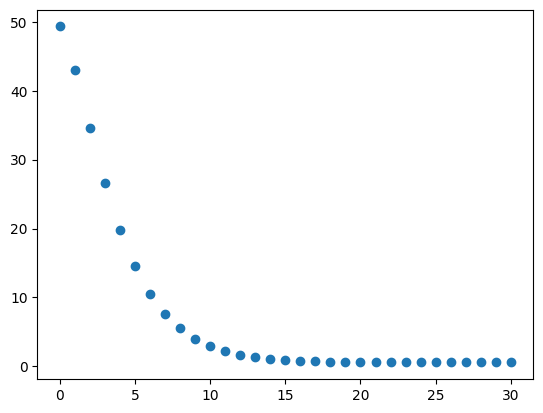

In [ ]:
epochs = list(range(len(loss)))
plt.scatter(epochs, loss)

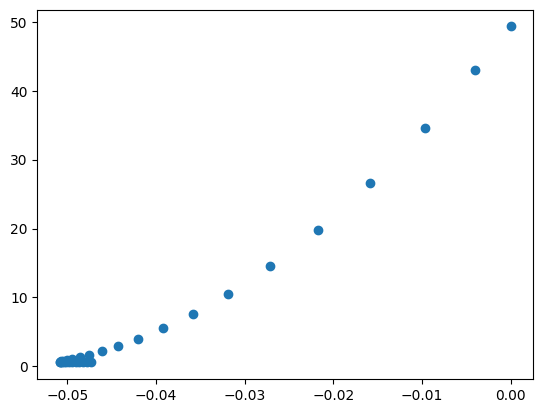

In [ ]:
plt.scatter(theta0s,loss)

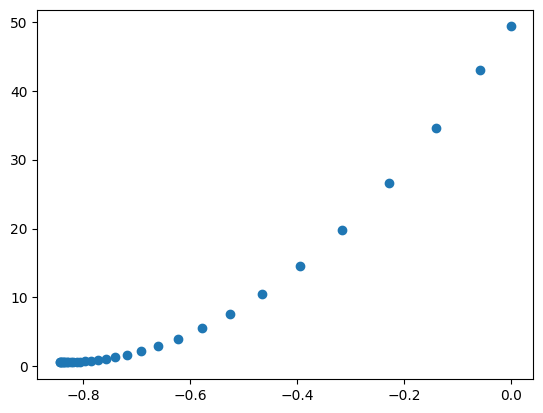

In [ ]:
plt.scatter(theta1s,loss)

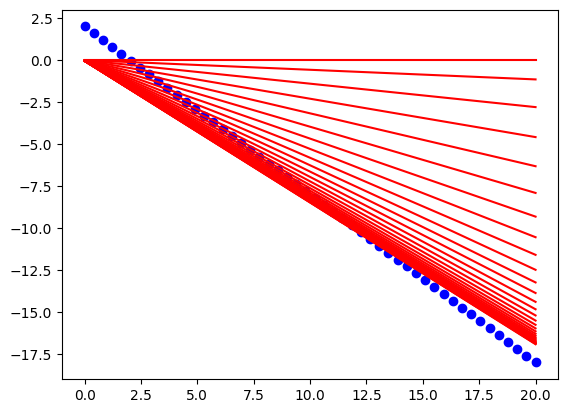

In [ ]:
plt.scatter(X,y,color='blue')
for i in range(len(hs)):
  plt.plot(X,hs[i],color='red')
  plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

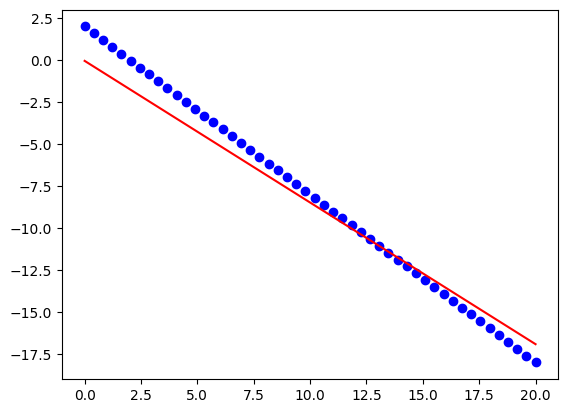

In [ ]:
plt.scatter(X,y,color='blue')
plt.plot(X,h,color='red')
plt.show

In [ ]:
# i will try a gamma value close to one
theta0s , theta1s , loss , theta0, theta1 , h ,hs = mom(X,y,0.0005,0.9,300)

**********iteration 0 **********

theta 0  0 

theta 1  0 

h  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.] 

errorvec  [-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ] 

j  49.34693877551021 

grad vector  [  8.         114.69387755] 

grad vector norm  114.97254258164628 

**********iteration 1 **********

theta 0  -0.004 

the

In [ ]:
len(loss)

80

In [ ]:
#more epochs with gamma close to 1

In [ ]:
r2_score(h,y)

0.964564130437936

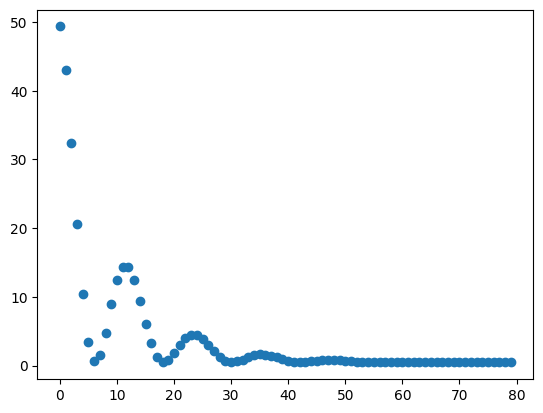

In [ ]:
epochs = list(range(len(loss)))
plt.scatter(epochs, loss)

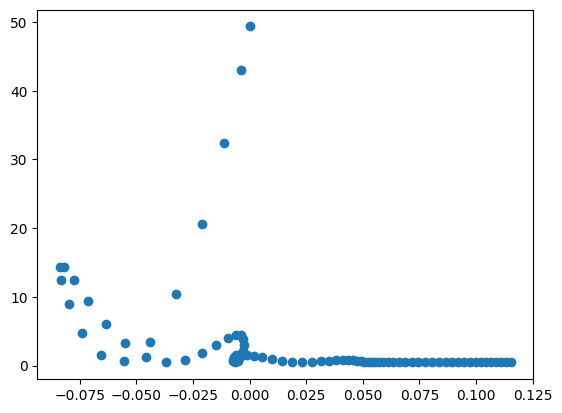

In [ ]:
plt.scatter(theta0s, loss)

<function matplotlib.pyplot.show(close=None, block=None)>

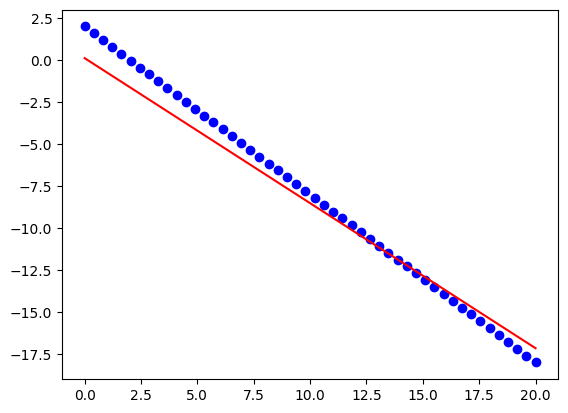

In [ ]:
plt.scatter(X,y,color='blue')
plt.plot(X,h,color='red')
plt.show

so with gamma close to 1, it took 80 iters, and as you can see the loss wasnt only decreasing, there were moments after reaching the min theta and the grad stopping due to a slope of 0, where the momentum was still going and the loss started going up again as we were getting further from the optimum theta, and as the we go up the gradient increases and the algorithm is gonna force us to go down towards the 0 again, which is gonna make the v decrease and we will go back and forth around the optimum untill we stop eventually. it may seem like a lot of iters but its still less than it would be if we were facing the vanishing gradient problem without using a cost conv check or MBG

Im gonna try gamma very close to 1

In [ ]:
theta0s , theta1s , loss , theta0, theta1 , h ,hs = mom(X,y,0.0005,0.99999,300)

Streaming output truncated to the last 5000 lines.

theta 1  -1.0252313516278764 

h  [  2.27099559   1.85253382   1.43407204   1.01561027   0.59714849
   0.17868671  -0.23977506  -0.65823684  -1.07669861  -1.49516039
  -1.91362217  -2.33208394  -2.75054572  -3.1690075   -3.58746927
  -4.00593105  -4.42439282  -4.8428546   -5.26131638  -5.67977815
  -6.09823993  -6.51670171  -6.93516348  -7.35362526  -7.77208703
  -8.19054881  -8.60901059  -9.02747236  -9.44593414  -9.86439591
 -10.28285769 -10.70131947 -11.11978124 -11.53824302 -11.9567048
 -12.37516657 -12.79362835 -13.21209012 -13.6305519  -14.04901368
 -14.46747545 -14.88593723 -15.304399   -15.72286078 -16.14132256
 -16.55978433 -16.97824611 -17.39670789 -17.81516966 -18.23363144] 

errorvec  [ 0.27099559  0.26069708  0.25039857  0.24010006  0.22980155  0.21950304
  0.20920453  0.19890602  0.18860751  0.178309    0.16801049  0.15771197
  0.14741346  0.13711495  0.12681644  0.11651793  0.10621942  0.09592091
  0.0856224   0.0753238

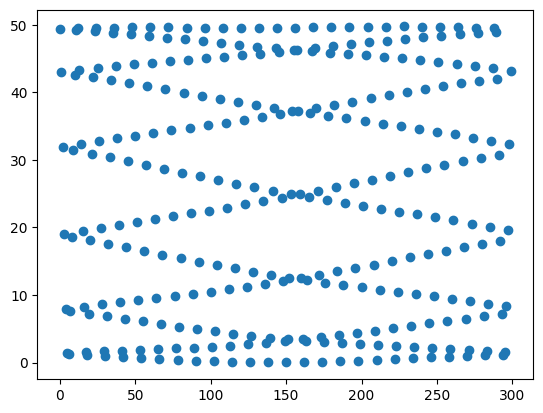

In [ ]:
epochs = list(range(len(loss)))
plt.scatter(epochs,loss)

<function matplotlib.pyplot.show(close=None, block=None)>

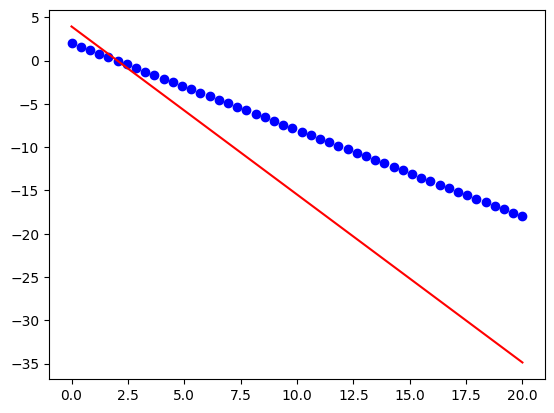

In [ ]:
plt.scatter(X,y,color='blue')
plt.plot(X,h,color='red')
plt.show

high gamma leads to high dep on history leads to divergence (high accum high step higher grad higher step.... = osci)

i will try very close to 0

In [ ]:
theta0s , theta1s , loss , theta0, theta1 , h ,hs = mom(X,y,0.0005,0.01,1000)

**********iteration 0 **********

theta 0  0 

theta 1  0 

h  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.] 

errorvec  [-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ] 

j  49.34693877551021 

grad vector  [  8.         114.69387755] 

grad vector norm  114.97254258164628 

**********iteration 1 **********

theta 0  -0.004 

the

In [ ]:
r2_score(h,y)

0.9553665967819487

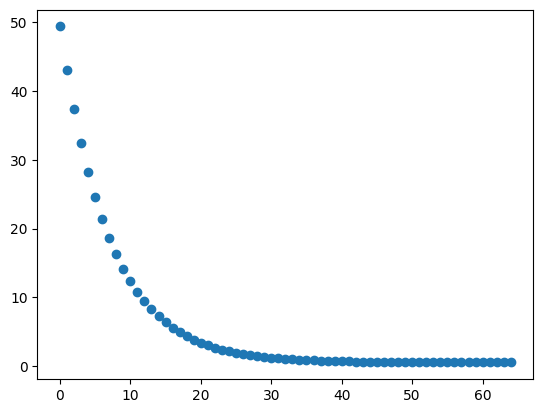

In [ ]:
epochs = list(range(len(loss)))
plt.scatter(epochs, loss)

when we use a value close to zero, my dependance on history wont be a lot so the training is gonna be smoother when going towards the min as the gradient is gonna influence the model the most, and there wont be a lot of accumulation so there wont be a lot or any back and forth around the optima. aka GD with no momentum


<function matplotlib.pyplot.show(close=None, block=None)>

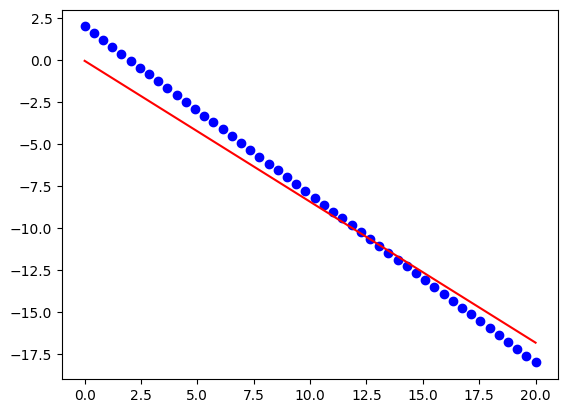

In [ ]:
plt.scatter(X,y,color='blue')
plt.plot(X,h,color='red')
plt.show

In [ ]:
theta0s , theta1s , loss , theta0, theta1 , h ,hs = mom(X,y,0.0005,0,1000)

**********iteration 0 **********

theta 0  0 

theta 1  0 

h  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.] 

errorvec  [-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ] 

j  49.34693877551021 

grad vector  [  8.         114.69387755] 

grad vector norm  114.97254258164628 

**********iteration 1 **********

theta 0  -0.004 

the

In [ ]:
r2_score(h,y)

0.9554093208784595

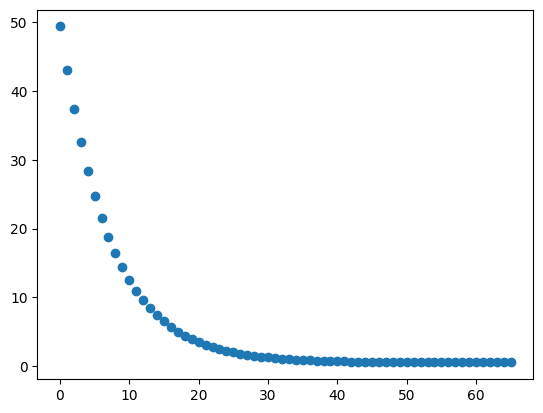

In [ ]:
plt.scatter(list(range(len(loss))),loss)

In [ ]:
#GD with no momentum

the mbgd problem of overshooting is solved by nag

NAG

In [ ]:
def nag(x , y , LR , gamma , iters):
  loss = []
  theta0s = []
  theta1s = []
  theta0 = 0
  theta1 = 0
  hypos = []
  prev_cost = float('inf')
  m = len(X)
  v_theta0 = 0
  v_theta1 = 0
  #  thetatemp0 =0
  # thetatemp1 = 0

  for i in range(iters):
    print("**********iteration",i,"**********\n")
    theta0s.append(theta0)
    theta1s.append(theta1)  #same size this way
    print("theta 0 ", theta0,"\n")
    print("theta 1 ", theta1,"\n")
    h = theta0 + theta1*x
    hypos.append(h)
    print("h ", h,"\n")
    error_vec = h-y
    print("errorvec " ,error_vec,"\n")
    j = np.mean(error_vec**2) / 2
    loss.append(j)
    print("j ",j,"\n")
    d_theta0 = np.sum(error_vec) / m
    d_theta1 = np.sum(error_vec*x)  / m
    gradvec = np.array([d_theta0,d_theta1])
    print("grad vector ", gradvec,"\n")
    gradvecNorm = np.linalg.norm(gradvec)
    print("grad vector norm ", gradvecNorm,"\n")


    if gradvecNorm < 0.001 or abs(prev_cost - j) < 0.001:
      break
    else:
      prev_cost = j
      thetatemp0 = theta0 - gamma*v_theta0
      thetatemp1 = theta1 - gamma*v_theta1
      h_temp = thetatemp0 + thetatemp1 * x

      error_vectemp = h_temp-y
      jtemp = np.mean(error_vectemp**2) / 2
      d_theta0temp = np.sum(error_vectemp) / m
      d_theta1temp = np.sum(error_vectemp*x)  / m
      gradvectemp = np.array([d_theta0temp,d_theta1temp])

      theta0 = thetatemp0 -  LR*d_theta0temp
      theta1 = thetatemp1 - LR*d_theta1temp

      v_theta0 = gamma*v_theta0 + LR*d_theta0temp
      v_theta1 = gamma*v_theta1 + LR*d_theta1temp


  return theta0s, theta1s, loss, theta0, theta1 , h , hypos

In [ ]:
# i will use the same parammeters to see difference between using nag and not using, the difference will be that i wont oscillate around the min as much
#and in less iters

In [ ]:
theta0s , theta1s , loss , theta0, theta1 , h ,hs = nag(X,y,0.0005,0.9,300)

**********iteration 0 **********

theta 0  0 

theta 1  0 

h  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.] 

errorvec  [-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ] 

j  49.34693877551021 

grad vector  [  8.         114.69387755] 

grad vector norm  114.97254258164628 

**********iteration 1 **********

theta 0  -0.004 

the

In [ ]:
r2_score(h,y)

0.9600420972853464

In [ ]:
len(loss)  #less iters

45

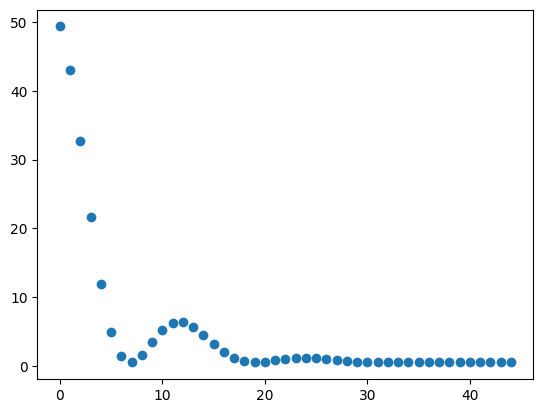

In [ ]:
epochs = list(range(len(loss)))
plt.scatter(epochs,loss)   #didnt oscillate much

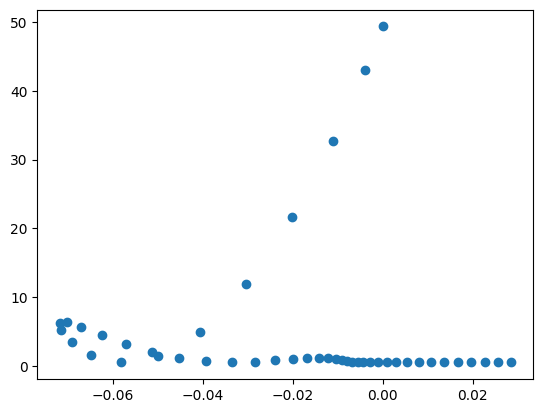

In [ ]:
plt.scatter(theta0s,loss)

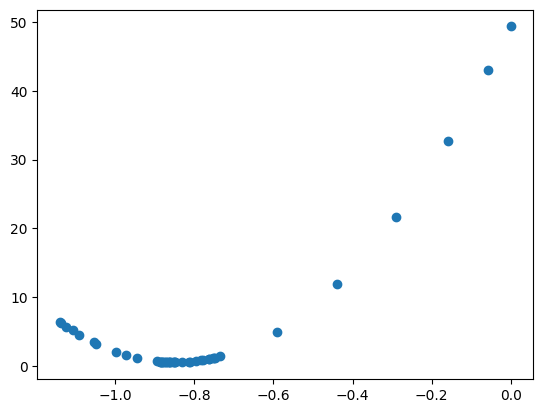

In [ ]:
plt.scatter(theta1s,loss)

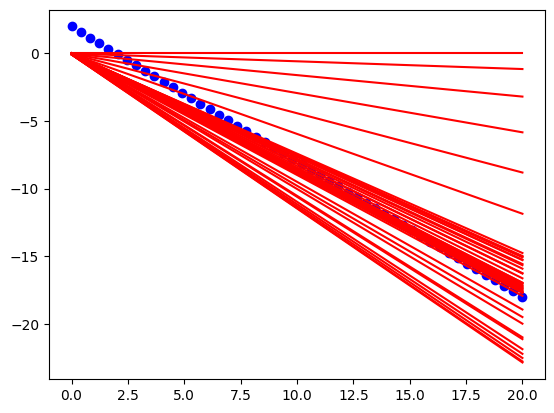

In [ ]:
plt.scatter(X,y,color='blue')
for i in range(len(hs)):
  plt.plot(X,hs[i],color='red')
  plt.show

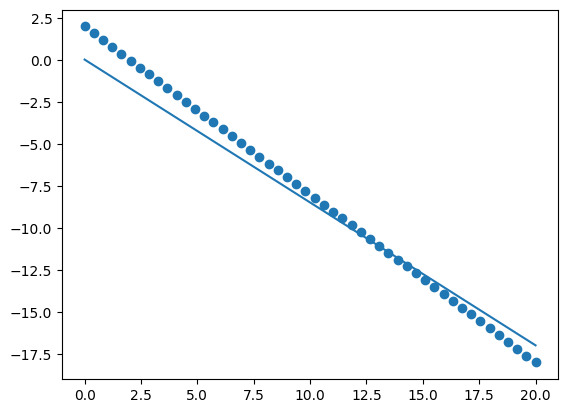

In [ ]:
plt.scatter(X,y)
plt.plot(X,h)